# Image Classification on CIFAR - 10

In [ ]:
#Essential libraries
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np

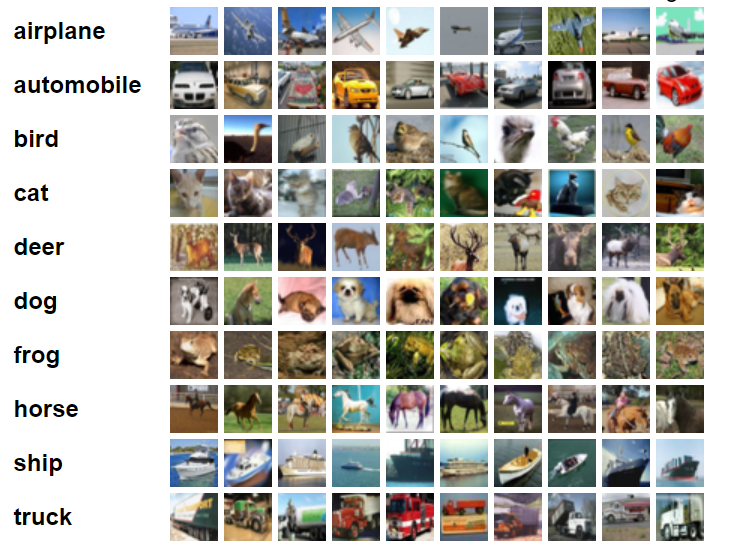

# Loading Dataset

In [ ]:
#Load data sets to train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#convert to float types
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Handling Dataset

In [ ]:
#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [ ]:
#defining number of classes
num_classes = 10 
# one-hot encoding to train and test
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)
# defining weight decay rate
weight_decay = 1e-4

# Model Building

In [ ]:
# model building
# defining Sequential model
model = Sequential()

#1st layer with sigmoid as activation function
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('sigmoid'))

#2nd layer with ELu as activation function
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# defining dropout layer to avoid overfitting
model.add(Dropout(0.2))

#3rd layer with ELu as activation function
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
#batch normalization to suppress values 
model.add(BatchNormalization())

#4th layer with tanh as activation function
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('tanh'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
#dropout layer with 0.3 as dropout rate
model.add(Dropout(0.3))

#5th layer with tanh as activation function
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('tanh'))
model.add(BatchNormalization())

#6th layer with ELu as activation function
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())

#defining MaxPool layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# final output layer with softmax as activation function
model.add(Dense(num_classes, activation='softmax'))

# Model Summary

In [ ]:
#Printing model summary
model.summary()

# Training the Model

In [ ]:
#training the model

#compiling the model with Adam as optimizer and Catagorical cross entropy
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#model training
model.fit(x_train, y_train,epochs=25, verbose=1)

# Evaluating Model for Test Dataset

In [ ]:
#Evaluating the model for test dataset
model.evaluate(x_test, y_test, batch_size=128, verbose=1)